## Property Investment Decision

Flipping Houses?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

### Preparing

In [2]:
data  = pd.read_csv('data/kc_house_data.csv')

In [3]:
# Usually checking the info first
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
# Invistigating objects
# First is Date
data['date'].unique()

array(['10/13/2014', '12/9/2014', '2/25/2015', '2/18/2015', '5/12/2014',
       '6/27/2014', '1/15/2015', '4/15/2015', '3/12/2015', '4/3/2015',
       '5/27/2014', '5/28/2014', '10/7/2014', '1/24/2015', '7/31/2014',
       '5/29/2014', '12/5/2014', '4/24/2015', '5/14/2014', '8/26/2014',
       '7/3/2014', '5/16/2014', '11/20/2014', '11/3/2014', '6/26/2014',
       '12/1/2014', '6/24/2014', '3/2/2015', '11/10/2014', '12/3/2014',
       '6/13/2014', '12/30/2014', '2/13/2015', '6/20/2014', '7/15/2014',
       '8/11/2014', '7/7/2014', '10/28/2014', '7/29/2014', '7/18/2014',
       '3/25/2015', '7/16/2014', '4/28/2015', '3/11/2015', '9/16/2014',
       '2/17/2015', '12/31/2014', '2/5/2015', '3/3/2015', '8/19/2014',
       '4/7/2015', '8/27/2014', '2/23/2015', '12/10/2014', '8/28/2014',
       '10/21/2014', '12/7/2014', '6/3/2014', '9/9/2014', '10/9/2014',
       '8/25/2014', '6/12/2014', '9/12/2014', '1/5/2015', '6/10/2014',
       '7/10/2014', '3/16/2015', '11/5/2014', '4/20/2015', '6/9/20

In [5]:
# Id like to narrow it down to year that it was sold
data['year_sold'] = pd.to_datetime(data['date']).dt.year

In [6]:
# Investigate sqft_basement column

data['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [7]:
# Noticed a char '?'

data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [8]:
# '?' has 452 instances. Could be a placeholder or does not have a basement
# 0.0 has 12,826 instances out of 21,597 . This means 59% of houses do not have a basement
# Therefore I will treat '?' as 0.0

data['sqft_basement'] = data['sqft_basement'].replace("\?", 0, regex=True).astype(float)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [10]:
# Check data missing
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
year_sold           0
dtype: int64

In [11]:
data['waterfront'].unique()

array([nan,  0.,  1.])

In [12]:
# It seems like it's a categorical that answers if the property is waterfront or not
data.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [13]:
# So filling NA as 0 and converting 'waterfront' to an integer as decimals are unnecessary
data['waterfront'] = data['waterfront'].fillna(0).astype(int)

In [14]:
data['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [15]:
data['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [16]:
# View looks to be categorical data (rating system)
# Majority of houses do not have a view rating plus small amount of NaN values
# Therefore I will treat NaN values as 0.

data['view'].fillna(0, inplace=True)

In [17]:
# Investigate yr_renovated column

data['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [18]:
data['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [19]:
# Again yr_renovated looks to be categorical data (years)
# Majority have not been renovated. Makes sense in terms of real world application

data['yr_renovated'].fillna(0, inplace=True)

In [20]:
# And I want to categorize it based on whether the property was renovated or not.
data['renovated'] = data['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

In [21]:
# rechecking

data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year_sold        0
renovated        0
dtype: int64

In [22]:
# Checking duplicates
data[data.duplicated(keep=False, subset=['id'])]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,renovated
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0,0.0,...,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500,2014,0
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0,0.0,...,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500,2014,0
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0,3.0,...,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244,2014,0
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0,3.0,...,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244,2014,0
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,0,0.0,...,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,0,0.0,...,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992,2015,0
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,0,0.0,...,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598,2014,0
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,0,0.0,...,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598,2015,0
21564,7853420110,10/3/2014,594866.0,3,3.00,2780,6000,2.0,0,0.0,...,0.0,2013,0.0,98065,47.5184,-121.886,2850,6000,2014,0


In [23]:
# Removing duplicates and retaining the first row for each duplicate entry.
data = data.drop_duplicates(keep='first', subset=['id'])

In [24]:
# making ID as index
data.set_index('id', drop=True, append=False, inplace=True)
data.index.name = None

In [25]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,renovated
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0.0,3,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,0
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0.0,3,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,1
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0.0,3,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,0
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0.0,5,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,0
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0.0,3,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0.0,3,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,2014,0
6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0.0,3,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2015,0
1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0.0,3,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,2014,0
291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0.0,3,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,2015,0


In [26]:
data.shape

(21420, 22)

In [27]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,renovated
count,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,...,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,0.233987,3.410784,7.662792,...,285.904342,1971.092997,68.956723,98077.87437,47.560197,-122.213784,1988.384080,12775.718161,2014.318954,0.034547
std,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.765437,0.650035,1.171971,...,440.008202,29.387141,364.552298,53.47748,0.138589,0.140791,685.537057,27345.621867,0.466082,0.182634
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,...,0.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000,2014.000000,0.000000
25%,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,0.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000,2014.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,0.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000,2014.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,550.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000,2015.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,4820.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,1.000000


Noticed a weird number in the bedrooms column

In [28]:
# Checking
data['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [29]:
# Noticed a different number which is 33, checking details
data[data['bedrooms'] == 33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,renovated
2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0,0.0,5,...,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700,2014,0


In [30]:
# One house has 33 bedrooms and sqft_living of 1620. This is below the mean
# It is unlikely this house has 33 bedrooms, possibly a recording error
data['bedrooms'] = data['bedrooms'].replace(33, 3)

In [31]:
# Rechecking
data[data['bedrooms'] == 33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,renovated


**Continues vs Categorical**

In [32]:
data['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [33]:
data['floors'].value_counts()

1.0    10552
2.0     8203
1.5     1888
3.0      609
2.5      161
3.5        7
Name: floors, dtype: int64

In [34]:
# I feel like bathrooms has too much categories, checking
data['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [35]:
# narrowing it down to whole numbers
data['bathrooms'] = data['bathrooms'].round().astype(int)

In [36]:
data['bathrooms'].unique()

array([1, 2, 3, 4, 5, 6, 0, 7, 8])

In [37]:
# Same as the yr_built, checking
unique_years = data['yr_built'].unique()
np.sort(unique_years)

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015])

In [38]:
# Narrowing it down to a 3 bins categorised by half century
# Convert yr_built;
# 1900 to 1950 = yr_1900-1950
# 1951 to 2000 = yr_1951-1900
# 2001 to 2015 = yr_2001-2015

def half_cent(year):
    if 1899 < year < 1951:
        return 1
    elif 1950 < year < 2000:
        return 2
    else: return 3

In [39]:
data['yr_built'] = data['yr_built'].apply(half_cent)

In [40]:
pd.set_option('display.max_columns', None)

In [41]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,renovated
7129300520,10/13/2014,221900.0,3,1,1180,5650,1.0,0,0.0,3,7,1180,0.0,2,0.0,98178,47.5112,-122.257,1340,5650,2014,0
6414100192,12/9/2014,538000.0,3,2,2570,7242,2.0,0,0.0,3,7,2170,400.0,2,1991.0,98125,47.7210,-122.319,1690,7639,2014,1
5631500400,2/25/2015,180000.0,2,1,770,10000,1.0,0,0.0,3,6,770,0.0,1,0.0,98028,47.7379,-122.233,2720,8062,2015,0
2487200875,12/9/2014,604000.0,4,3,1960,5000,1.0,0,0.0,5,7,1050,910.0,2,0.0,98136,47.5208,-122.393,1360,5000,2014,0
1954400510,2/18/2015,510000.0,3,2,1680,8080,1.0,0,0.0,3,8,1680,0.0,2,0.0,98074,47.6168,-122.045,1800,7503,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2,1530,1131,3.0,0,0.0,3,8,1530,0.0,3,0.0,98103,47.6993,-122.346,1530,1509,2014,0
6600060120,2/23/2015,400000.0,4,2,2310,5813,2.0,0,0.0,3,8,2310,0.0,3,0.0,98146,47.5107,-122.362,1830,7200,2015,0
1523300141,6/23/2014,402101.0,2,1,1020,1350,2.0,0,0.0,3,7,1020,0.0,3,0.0,98144,47.5944,-122.299,1020,2007,2014,0
291310100,1/16/2015,400000.0,3,2,1600,2388,2.0,0,0.0,3,8,1600,0.0,3,0.0,98027,47.5345,-122.069,1410,1287,2015,0


In [42]:
# Droppping columns
data.drop(columns=['date', 'yr_renovated', 'lat', 'long'], inplace = True)

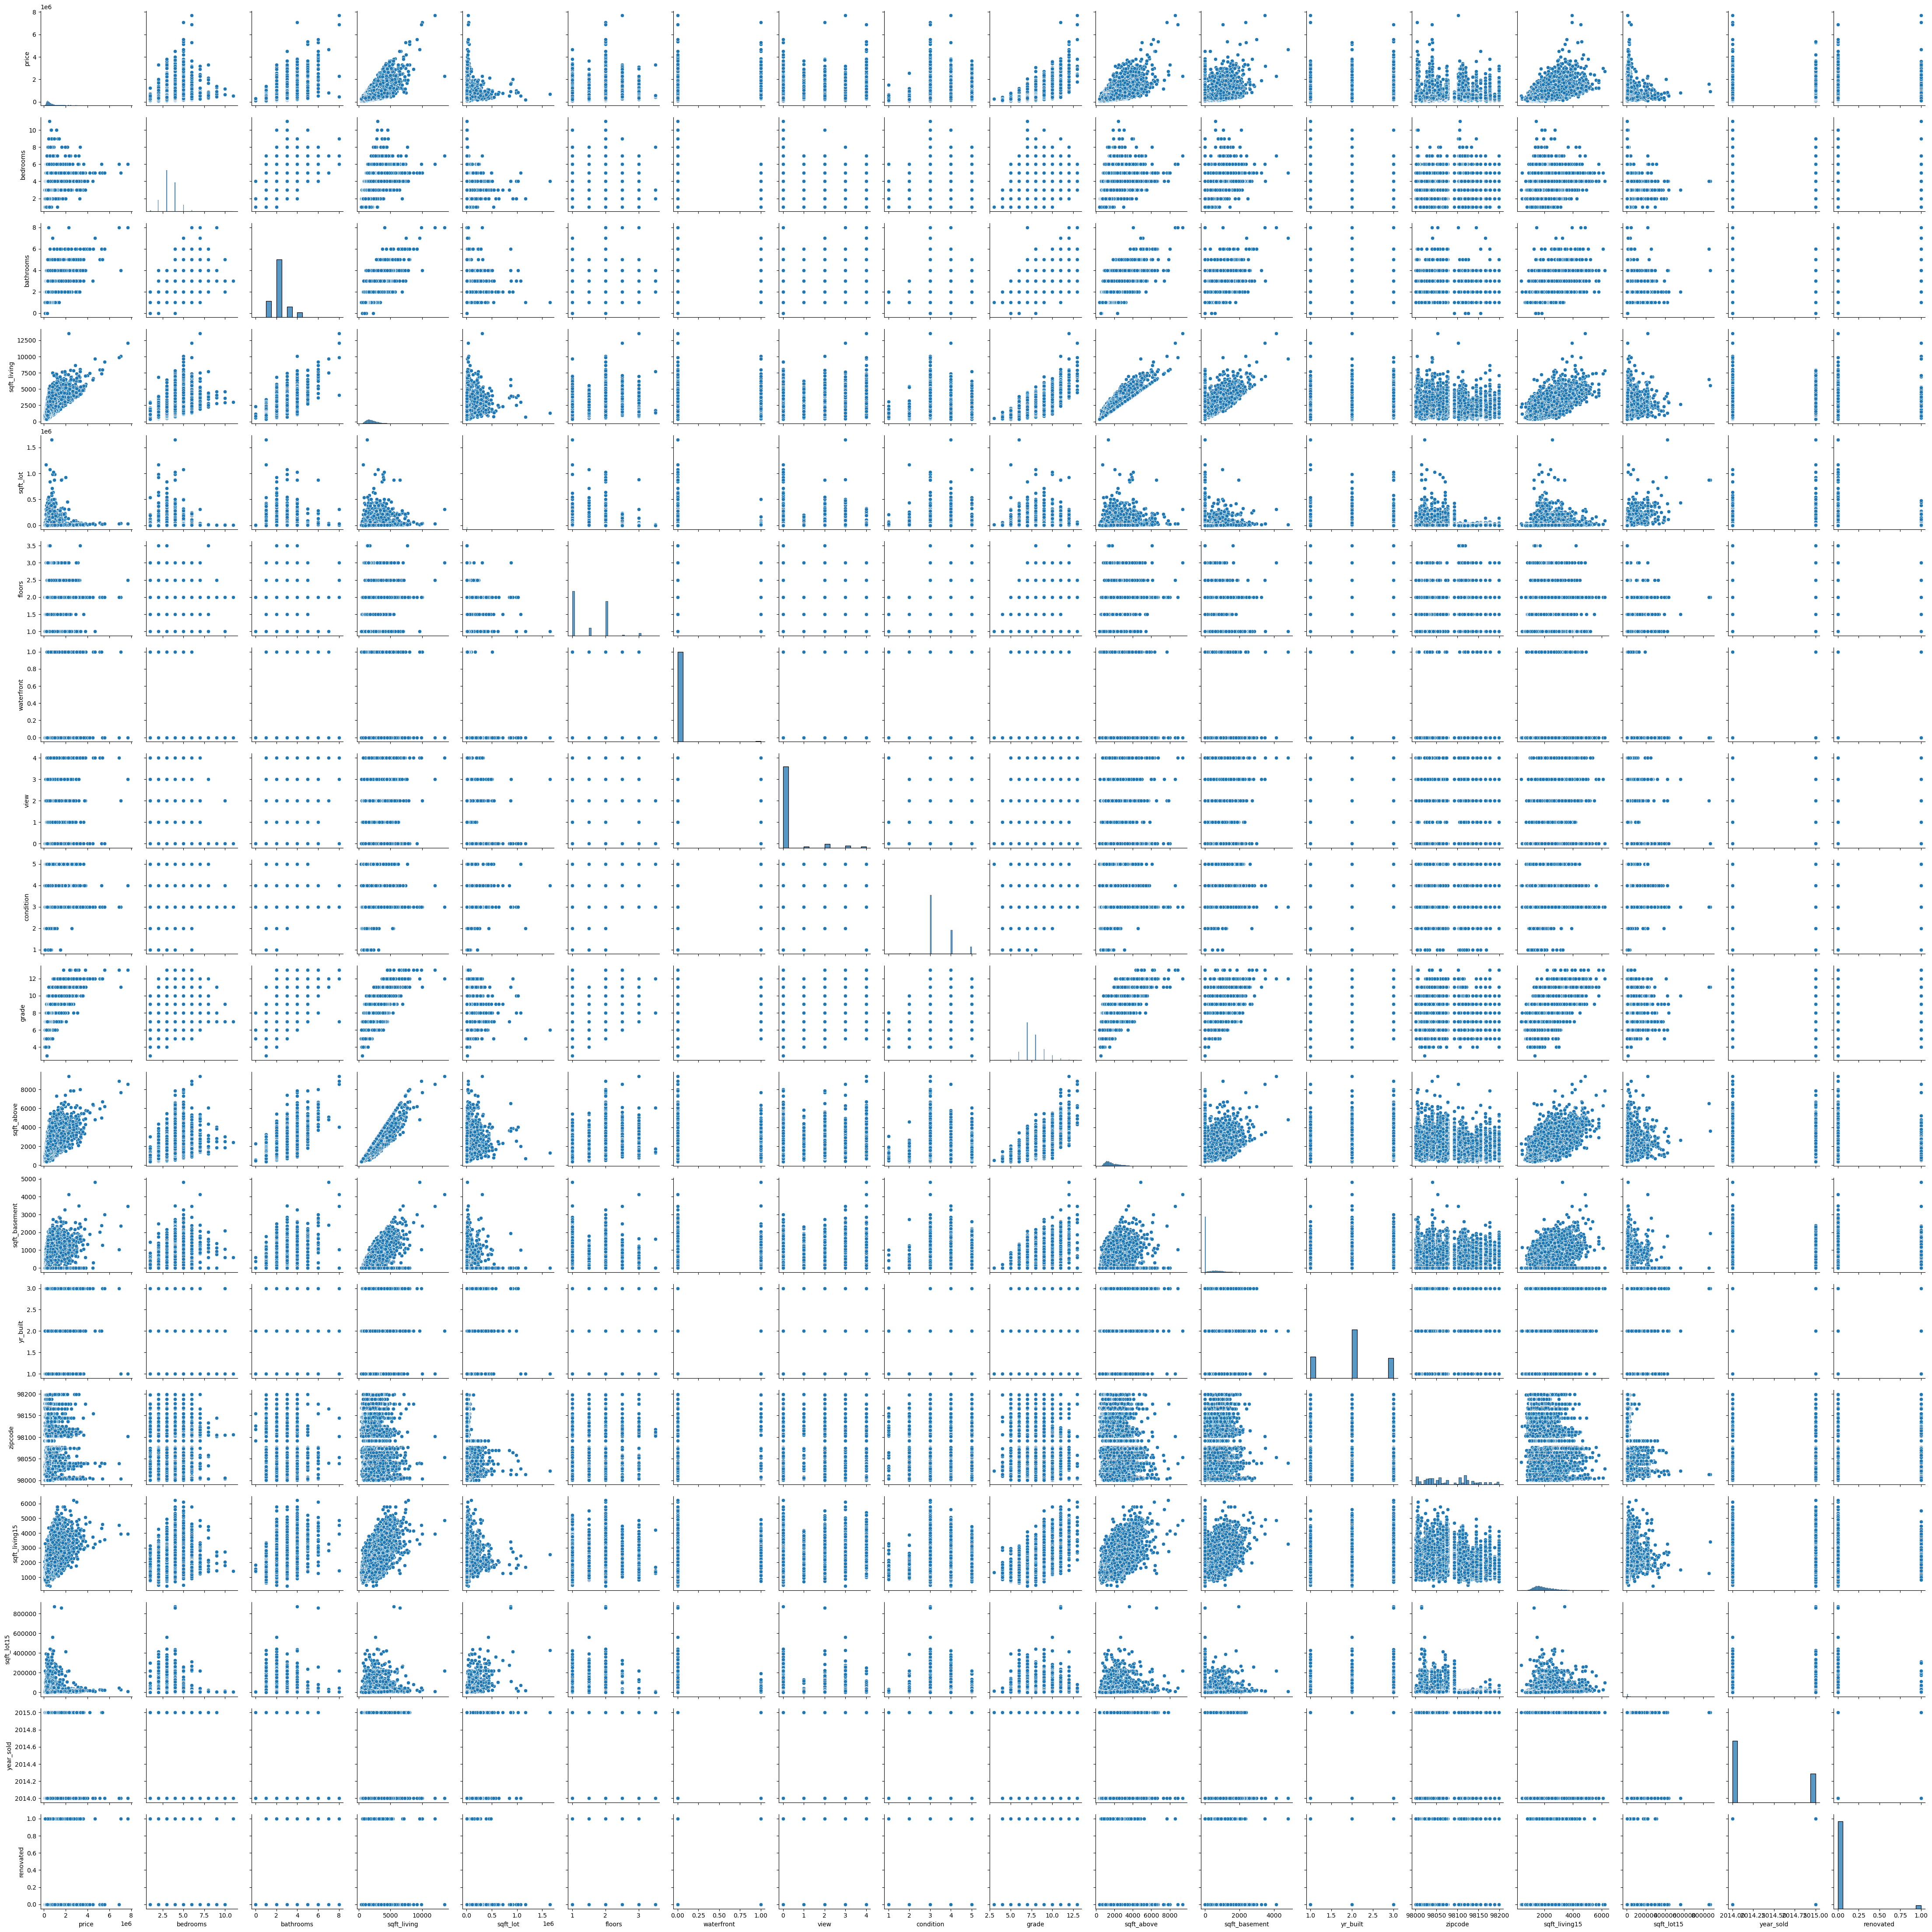

In [43]:
sns.pairplot(data);

In [44]:
data.nunique()

price            3607
bedrooms           11
bathrooms           9
sqft_living      1034
sqft_lot         9776
floors              6
waterfront          2
view                5
condition           5
grade              11
sqft_above        942
sqft_basement     303
yr_built            3
zipcode            70
sqft_living15     777
sqft_lot15       8682
year_sold           2
renovated           2
dtype: int64

Seems like we have the following in:

Continues variables:
- price
- sqft_living
- sqft_lot
- sqft_above
- sqft_basement
- sqft_living15
- sqft_lot15


Categorical variables:
- bedrooms
- bathrooms
- floors
- waterfront
- view
- condition
- grade
- yr_built
- year_sold
- renovated

Seems like I am okay with my EDA, Let's do our base model now

---
## Iteration 1

In [45]:
# Creating new df to avoid messing with the original one
df1 = data.copy()

In [46]:
df1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15', 'sqft_lot15',
       'year_sold', 'renovated'],
      dtype='object')

In [47]:
Y = 'price'
X = ('sqft_living + sqft_above + sqft_basement + sqft_lot + sqft_living15 + sqft_lot15 + C(bedrooms) + C(bathrooms) + C(floors) + C(waterfront) + C(view) + C(condition) + C(grade) + C(yr_built) + C(zipcode) + C(year_sold) + C(renovated)')

In [48]:
ols_formula = Y + "~" + X

OLS = ols(formula = ols_formula, data = df1)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     929.7
Date:                Mon, 25 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:10:01   Log-Likelihood:            -2.8522e+05
No. Observations:               21420   AIC:                         5.707e+05
Df Residuals:                   21298   BIC:                         5.717e+05
Df Model:                         121                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -8.398e+04   1.68e+05     -0.501      0.617   -4.13e+05    2.45e+05
C(bedrooms)[T.2]      9605.1388   1.13e+04      0.846      0.397   -1.26e+04    3.18e+04
C(bedrooms)[T.3]      2.254e+04   1.14e+04      1.978      0.048     203.225    4.49e+04
C(bedrooms)[T.4]      5273.0185   1.16e+04      0.453      0.651   -1.76e+04    2.81e+04
C(bedrooms)[T.5]     -6942.7487   1.23e+04     -0.565      0.572    -3.1e+04    1.71e+04
C(bedrooms)[T.6]     -3.093e+04    1.5e+04     -2.064      0.039   -6.03e+04   -1558.083
C(bedrooms)[T.7]     -1.487e+05   2.72e+04     -5.466      0.000   -2.02e+05   -9.54e+04
C(bedrooms)[T.8]     -1.016e+04   4.31e+04     -0.236      0.814   -9.46e+04    7.43e+04
C(bedrooms)[T.9]     -3.879e+05   6.31e+04     -6.143      0.000   -5.12e+05   -2.64e+05
C(bedrooms)[T.10]    -3.177e+05   8.63e+04     -3.681      0.000   -4.87e+05   -1.49e+05
C(bedrooms)[T.11]     -5.62e+04   1.48e+05     -0.380      0.704   -3.46e+05    2.34e+05
C(bathrooms)[T.1]     2.851e+04   7.38e+04      0.386      0.699   -1.16e+05    1.73e+05
C(bathrooms)[T.2]     1.959e+04   7.38e+04      0.265      0.791   -1.25e+05    1.64e+05
C(bathrooms)[T.3]     3.439e+04   7.39e+04      0.465      0.642   -1.11e+05    1.79e+05
C(bathrooms)[T.4]     6.186e+04   7.41e+04      0.835      0.404   -8.33e+04    2.07e+05
C(bathrooms)[T.5]     2.806e+05   7.67e+04      3.658      0.000     1.3e+05    4.31e+05
C(bathrooms)[T.6]      3.95e+05   8.09e+04      4.880      0.000    2.36e+05    5.54e+05
C(bathrooms)[T.7]     2.885e+05   1.29e+05      2.229      0.026    3.48e+04    5.42e+05
C(bathrooms)[T.8]     1.279e+06    1.1e+05     11.676      0.000    1.06e+06    1.49e+06
C(floors)[T.1.5]     -1.351e+04   4187.829     -3.227      0.001   -2.17e+04   -5306.132
C(floors)[T.2.0]     -2.407e+04   3354.841     -7.174      0.000   -3.06e+04   -1.75e+04
C(floors)[T.2.5]      5.445e+04   1.23e+04      4.413      0.000    3.03e+04    7.86e+04
C(floors)[T.3.0]     -6.947e+04   7497.777     -9.266      0.000   -8.42e+04   -5.48e+04
C(floors)[T.3.5]      1.464e+04   5.63e+04      0.260      0.795   -9.57e+04    1.25e+05
C(waterfront)[T.1]    6.001e+05   1.53e+04     39.322      0.000     5.7e+05     6.3e+05
C(view)[T.1.0]        8.713e+04   8409.701     10.361      0.000    7.07e+04    1.04e+05
C(view)[T.2.0]        6.891e+04   5135.446     13.418      0.000    5.88e+04     7.9e+04
C(view)[T.3.0]        1.523e+05   7030.318     21.657      0.000    1.38e+05    1.66e+05
C(view)[T.4.0]        2.923e+05   1.07e+04     27.395      0.000    2.71e+05    3.13e+05
C(condition)[T.2]     9.529e+04   3.03e+04      3.146      0.002    3.59e+04    1.55e+05
C(condition)[T.3]     1.095e+05   2.81e+04      3.891      0.000    5.43e+04    1.65e+05
C(condition)[T.4]     1.378e+05   2.82e+04      4.894    

 - **Skew**  = 1.862 indicates the model is positively skewed

 - **Kurtosis** = 23.591 suggests that the residuals in the OLS regression model have heavy tails, which can have implications for the validity of the model's assumptions and the reliability of its results. Further investigation and potentially some adjustments to the model or data preprocessing may be necessary to address this issue and improve the model's performance.
 
Also, the R-squared and Adjusted R-squared values are very close to each other, indicating that the inclusion of independent variables in the model does not significantly affect the model's explanatory power. This suggests that the independent variables included in the model are collectively explaining a substantial portion (about  69% to 68.9%) of the variance in the dependent variable.

We will address these issues while working to improve our R-squared and Adjusted R-squared values.

### Distribution and KDE

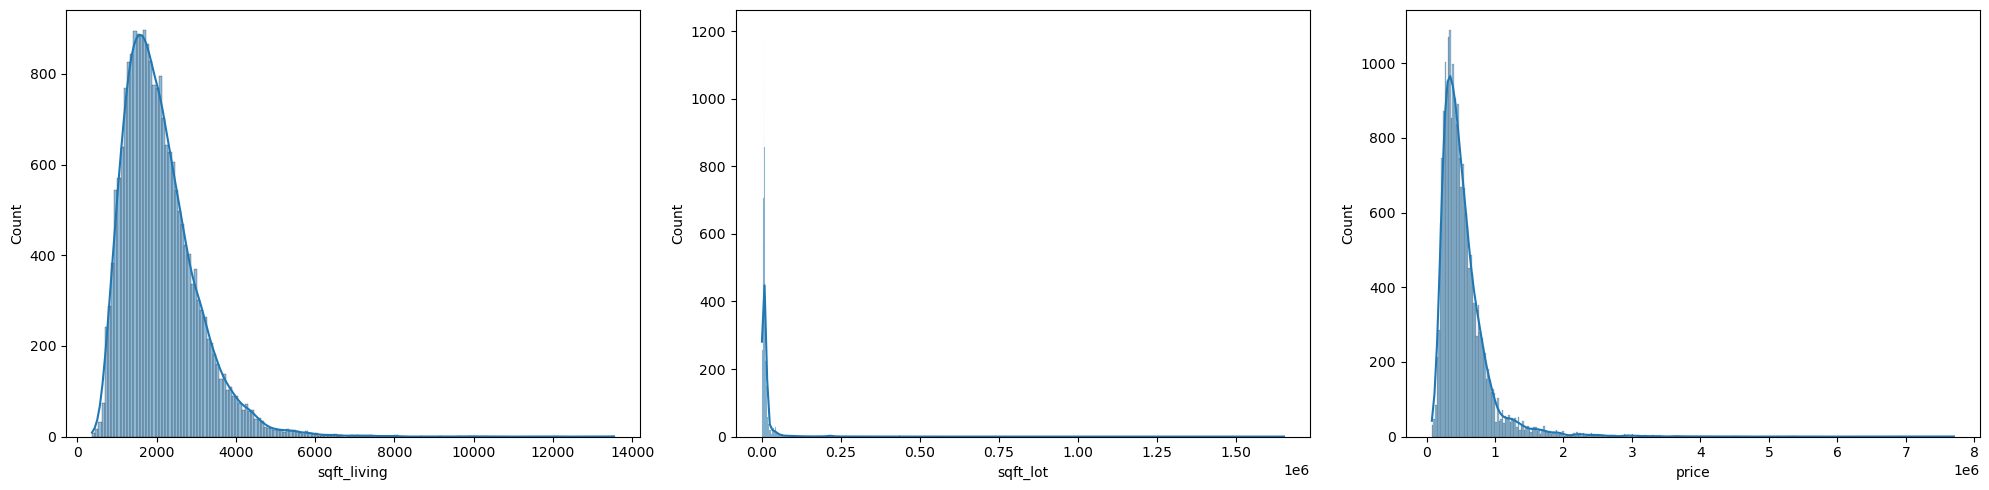

In [49]:
fig, axes = plt.subplots(1, 3, figsize = (20,5))
columns = ['sqft_living', 'sqft_lot','price']

sns.histplot(data=df1, x="sqft_living", kde=True, ax=axes[0])
sns.histplot(data=df1, x="sqft_lot", kde=True, ax=axes[1])
sns.histplot(data=df1, x="price", kde=True, ax=axes[2])

plt.tight_layout()
plt.show()

### Distribution and KDE comments

Normal distribution with positive skew

- price
- sqft_living
- sqft_lot

Positive skewness means that the tails of the distributions for these variables are longer on the right side (toward higher values), and most of the data points are concentrated on the left side (toward lower values).

### Model assumption: Linearity

Identify which variables have a linear relationship with the target variable price

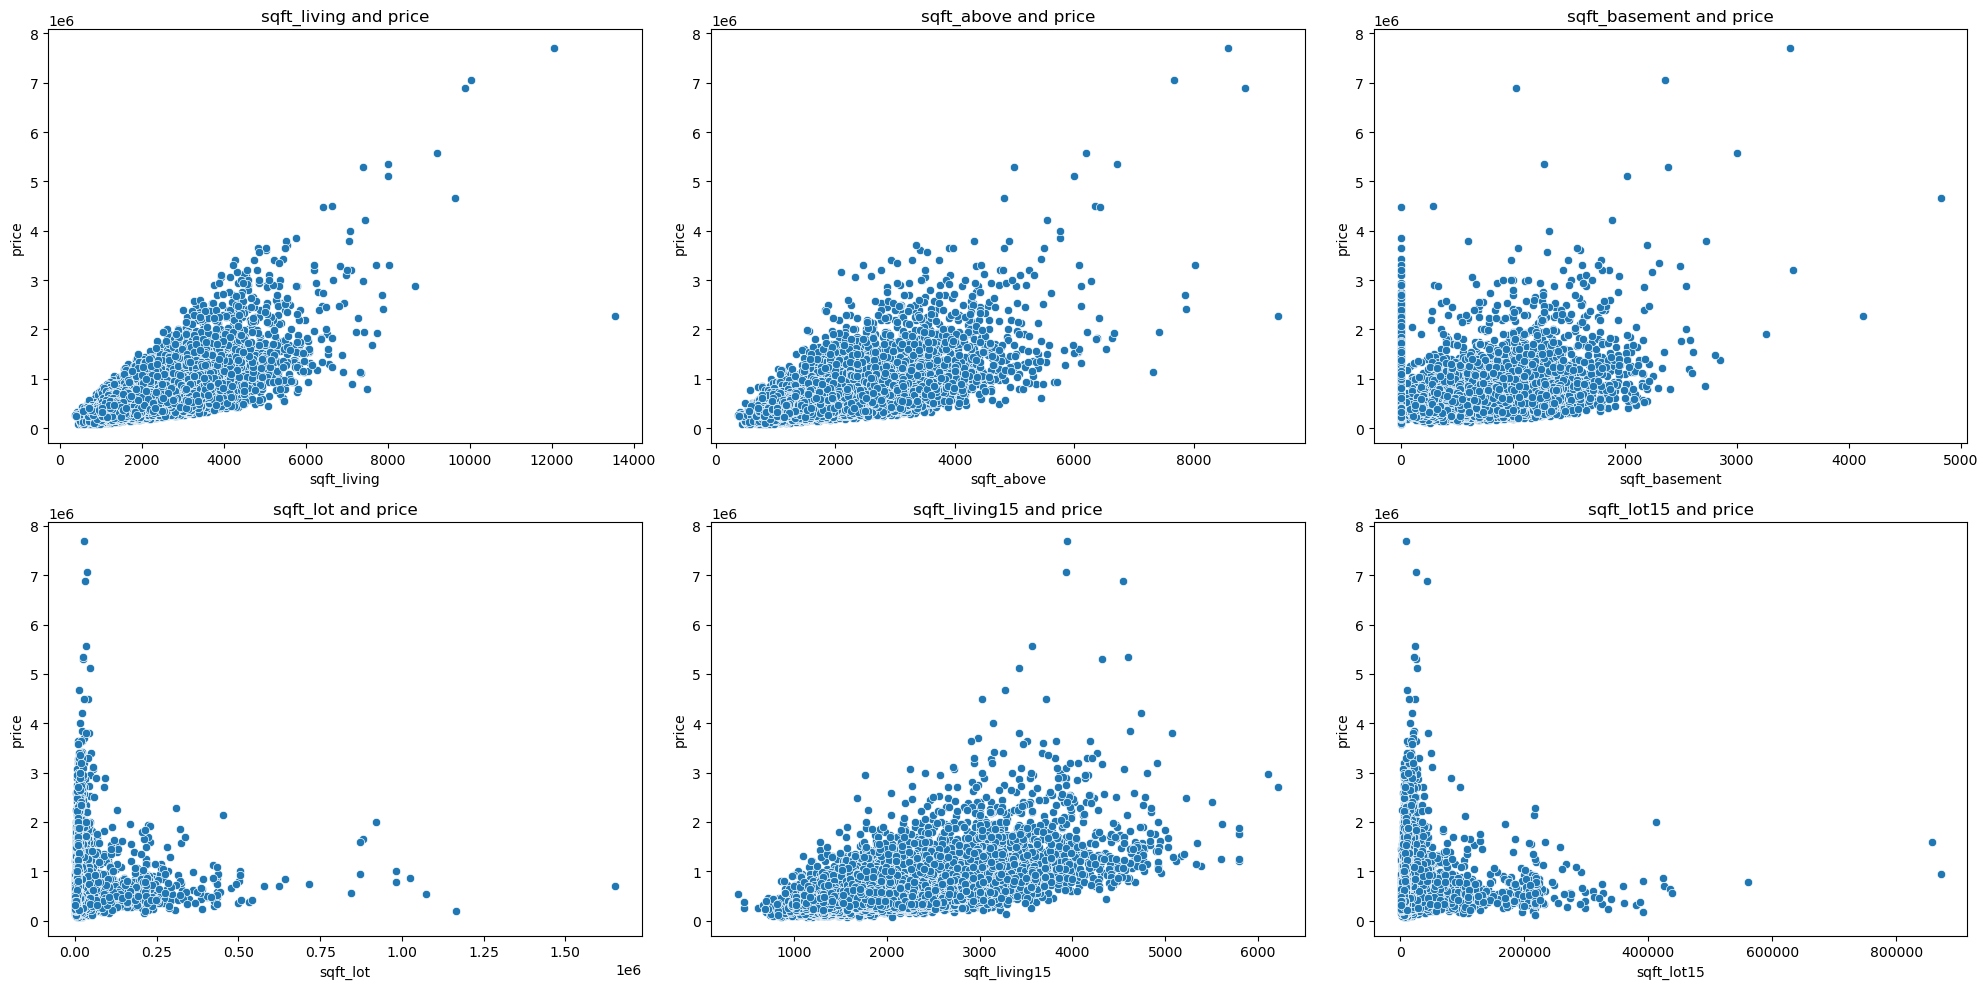

In [50]:
# sqft_living + sqft_above + sqft_basement + sqft_lot + sqft_living15 + sqft_lot15

fig, axes = plt.subplots(2, 3, figsize = (20,10))

sns.scatterplot(x = df1['sqft_living'], y = df1['price'],ax=axes[0][0])
axes[0][0].set_title("sqft_living and price")

sns.scatterplot(x = df1['sqft_above'], y = df1['price'],ax=axes[0][1])
axes[0][1].set_title("sqft_above and price")

sns.scatterplot(x = df1['sqft_basement'], y = df1['price'],ax=axes[0][2])
axes[0][2].set_title("sqft_basement and price")

sns.scatterplot(x = df1['sqft_lot'], y = df1['price'],ax=axes[1][0])
axes[1][0].set_title("sqft_lot and price")

sns.scatterplot(x = df1['sqft_living15'], y = df1['price'],ax=axes[1][1])
axes[1][1].set_title("sqft_living15 and price")

sns.scatterplot(x = df1['sqft_lot15'], y = df1['price'],ax=axes[1][2])
axes[1][2].set_title("sqft_lot15 and price")

plt.tight_layout()
plt.show()

Variables that have a strong linear relationship with price.
- sqft_living
- sqft_above
- sqft_living15

Variables that have a weak linear relationship with price.
- sqft_lot
- sqft_lot15

sqft_basement shows a strong linear relationship with price if there's any. We will just make this into category with a base of zero

### Model assumption: Normality

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

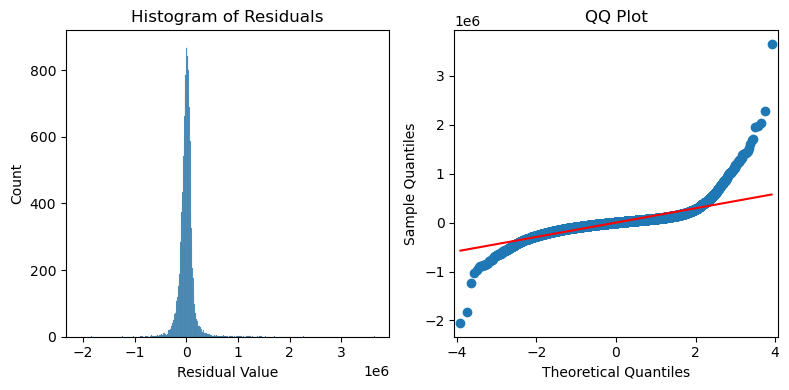

In [51]:
# Calculate the residuals.
residuals = model.resid

fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("QQ Plot")

plt.tight_layout()
plt.show()

- I believe the histogram exhibits a slight positive skew. Shows heavier tails than the normal distribution.
- The residuals in the Q-Q plot appear to form an almost straight line. Largest values are larger (more extreme) than would be expected. Will check outliers as well

### Model assumption: Constant variance

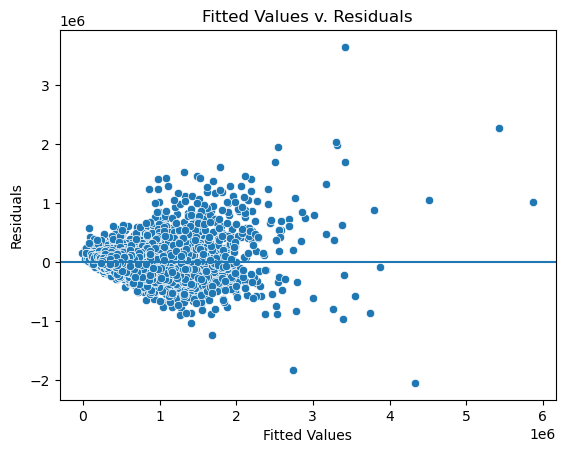

In [52]:
# Create a scatterplot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")
fig.axhline(0)

plt.show()

The variance of the residuals increases with X, indicating a violation of the constant variance assumption.

One potential solution to address this issue is to consider weighted regression, which can account for the changing variance. It's evident that the assumptions of the model may not hold under these circumstances.

### Model assumption: No multicollinearity

In [53]:
# Calculate the variance inflation factor (optional).

# variance_inflation_factor from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# subset of the data with the continous independent variables. 
# sqft_living + sqft_above + sqft_basement + sqft_lot + sqft_living15 + sqft_lot15
X = df1[['sqft_living', 'sqft_above', 'sqft_basement', 'sqft_lot', 'sqft_living15', 'sqft_lot15']]

# variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

,VIF
sqft_living,868.971135
sqft_above,658.168494
sqft_basement,46.660589
sqft_lot,2.350843
sqft_living15,15.460750
sqft_lot15,2.547319


"sqft_living" and "sqft_above" have exceptionally high VIF values, suggesting strong multicollinearity. We may need to explore strategies to address this multicollinearity issue, such as removing one of these variables.

We will explore correlation.

In [54]:
df1.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,year_sold,renovated
price,1.000000,0.316714,0.520011,0.701875,0.089111,0.256286,0.264898,0.393113,0.034779,0.668020,0.605294,0.320842,0.064930,-0.052371,0.584549,0.082438,0.004956,0.118179
bedrooms,0.316714,1.000000,0.500827,0.594221,0.033638,0.183570,-0.002132,0.080772,0.022743,0.367750,0.493566,0.303463,0.172919,-0.159637,0.406240,0.031787,-0.009346,0.017924
bathrooms,0.520011,0.500827,1.000000,0.702395,0.089964,0.367305,0.064633,0.200012,-0.070348,0.591285,0.599946,0.328988,0.358590,-0.143632,0.497687,0.087315,-0.021405,0.062385
sqft_living,0.701875,0.594221,0.702395,1.000000,0.172586,0.352868,0.104737,0.280839,-0.061677,0.762477,0.876533,0.428026,0.292306,-0.198995,0.756186,0.183837,-0.025785,0.050623
sqft_lot,0.089111,0.033638,0.089964,0.172586,1.000000,-0.005561,0.021429,0.075360,-0.009169,0.113656,0.183210,0.014859,0.016377,-0.129422,0.143805,0.717743,0.006141,0.005105
floors,0.256286,0.183570,0.367305,0.352868,-0.005561,1.000000,0.020578,0.027175,-0.266859,0.458091,0.522751,-0.242154,0.462616,-0.058532,0.279071,-0.011367,-0.018746,0.003063
waterfront,0.264898,-0.002132,0.064633,0.104737,0.021429,0.020578,1.000000,0.381654,0.016608,0.082905,0.071737,0.083324,-0.025438,0.029183,0.083921,0.030653,-0.004343,0.074429
view,0.393113,0.080772,0.200012,0.280839,0.075360,0.027175,0.381654,1.000000,0.044678,0.247632,0.165289,0.270130,-0.055585,0.087334,0.277555,0.073381,0.002932,0.090122
condition,0.034779,0.022743,-0.070348,-0.061677,-0.009169,-0.266859,0.016608,0.044678,1.000000,-0.150508,-0.161483,0.168811,-0.329565,0.004372,-0.095256,-0.003450,-0.044917,-0.055836
grade,0.668020,0.367750,0.591285,0.762477,0.113656,0.458091,0.082905,0.247632,-0.150508,1.000000,0.756221,0.164502,0.402141,-0.183588,0.713178,0.120056,-0.025743,0.015385


In [55]:
abs(df1.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,year_sold,renovated
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,True,True,False,False,False,True,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False


In [56]:
df=df1.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)

In [57]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876533
"(sqft_living, grade)",0.762477
"(sqft_above, grade)",0.756221
"(sqft_living15, sqft_living)",0.756186


The pairs on the left side, along with the correlation coefficients on the right, indicate a strong positive linear relationship between each pair of independent variables, as indicated by a correlation coefficient of at least 0.75.

---
# Iteration 2

**Adjustments**: Addressing issues in Iteration 1 (First Model)
1. We will remove "sqft_lot" and "sqft_lot15" from our analysis due to their weak linear relationships.
2. We'll drop 'sqft_living15' and 'sqft_above' but keep 'sqft_living' and 'grade' due to their relatability. We'll also assess them after applying transformations to see if there's any improvement
3. Regarding normality, we will investigate the presence of outliers and take steps to address them.
4. We will apply Log Transformation to handle the distribution and skewness of our data.

In [58]:
# sqft_basement = 0, 500, 1500, 2000


def categorised(basement):
    if basement == 0:
        return 0
    elif 1 <= basement <= 500:
        return 500
    elif 500 < basement <= 1000:
        return 1000
    elif 1000 < basement <= 1500:
        return 1500
    else: return 2000    

In [59]:
df1['sqft_basement'] = df1['sqft_basement'].apply(categorised)

In [60]:
# droppping 'sqft_lot', 'sqft_lot15', 'sqft_living', 'sqft_above'
df2 = df1.drop(columns=['sqft_lot', 'sqft_lot15', 'sqft_living15', 'sqft_above'])

Remaining continues variables:
- price
- sqft_living

Categorical variables:
- bedrooms
- bathrooms
- floors
- waterfront
- view
- condition
- grade
- yr_built
- year_sold
- renovated
- sqft_basement

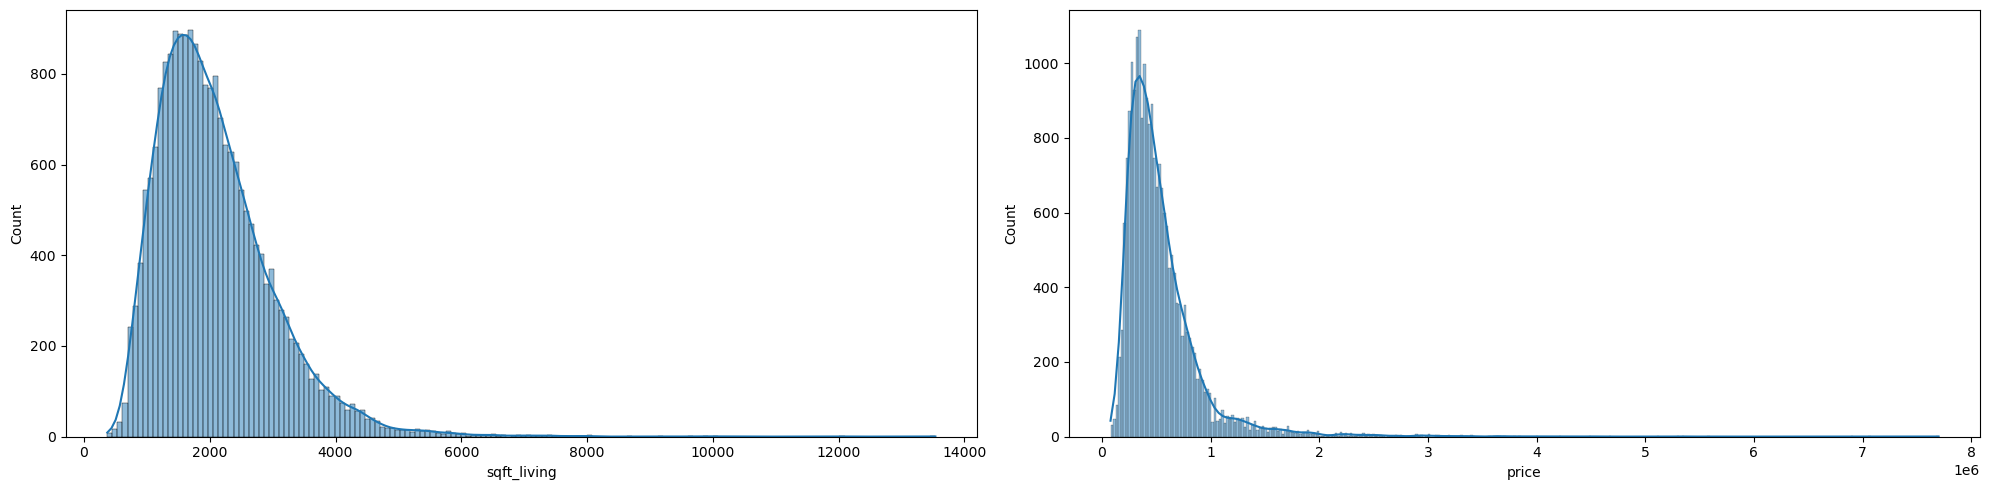

In [61]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))
columns = ['sqft_living15','price']

sns.histplot(data=df2, x="sqft_living", kde=True, ax=axes[0])
sns.histplot(data=df2, x="price", kde=True, ax=axes[1])

plt.tight_layout()
plt.show()

**Investigate the presence of outliers and take steps to address them**

In [62]:
# Reduce outliers by reducing data size to 3 standard deviations

column= ['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors', 'floors', 'condition', 'grade',]

df2 = df2[~df2[column].apply(lambda x: np.abs(x - x.mean()) > 3 * x.std()).any(axis=1)]

In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20755 entries, 7129300520 to 1523300157
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20755 non-null  float64
 1   bedrooms       20755 non-null  int64  
 2   bathrooms      20755 non-null  int64  
 3   sqft_living    20755 non-null  int64  
 4   floors         20755 non-null  float64
 5   waterfront     20755 non-null  int64  
 6   view           20755 non-null  float64
 7   condition      20755 non-null  int64  
 8   grade          20755 non-null  int64  
 9   sqft_basement  20755 non-null  int64  
 10  yr_built       20755 non-null  int64  
 11  zipcode        20755 non-null  int64  
 12  year_sold      20755 non-null  int64  
 13  renovated      20755 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.4 MB


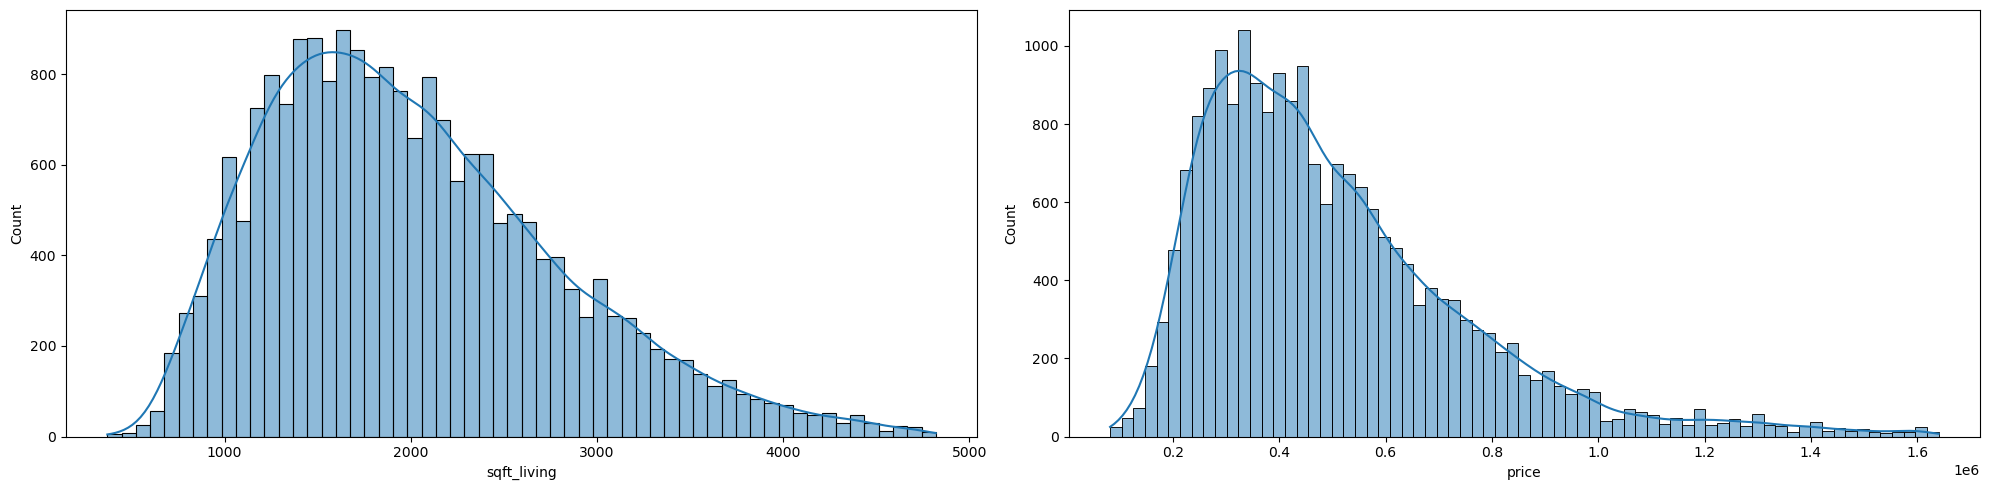

In [64]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))

sns.histplot(data=df2, x="sqft_living", kde=True, ax=axes[0])
sns.histplot(data=df2, x="price", kde=True, ax=axes[1])

plt.tight_layout()
plt.show()

### Log Transformation

In [65]:
df2['sqft_living'] = np.log(df2['sqft_living'])
df2['price'] = np.log(df2['price'])

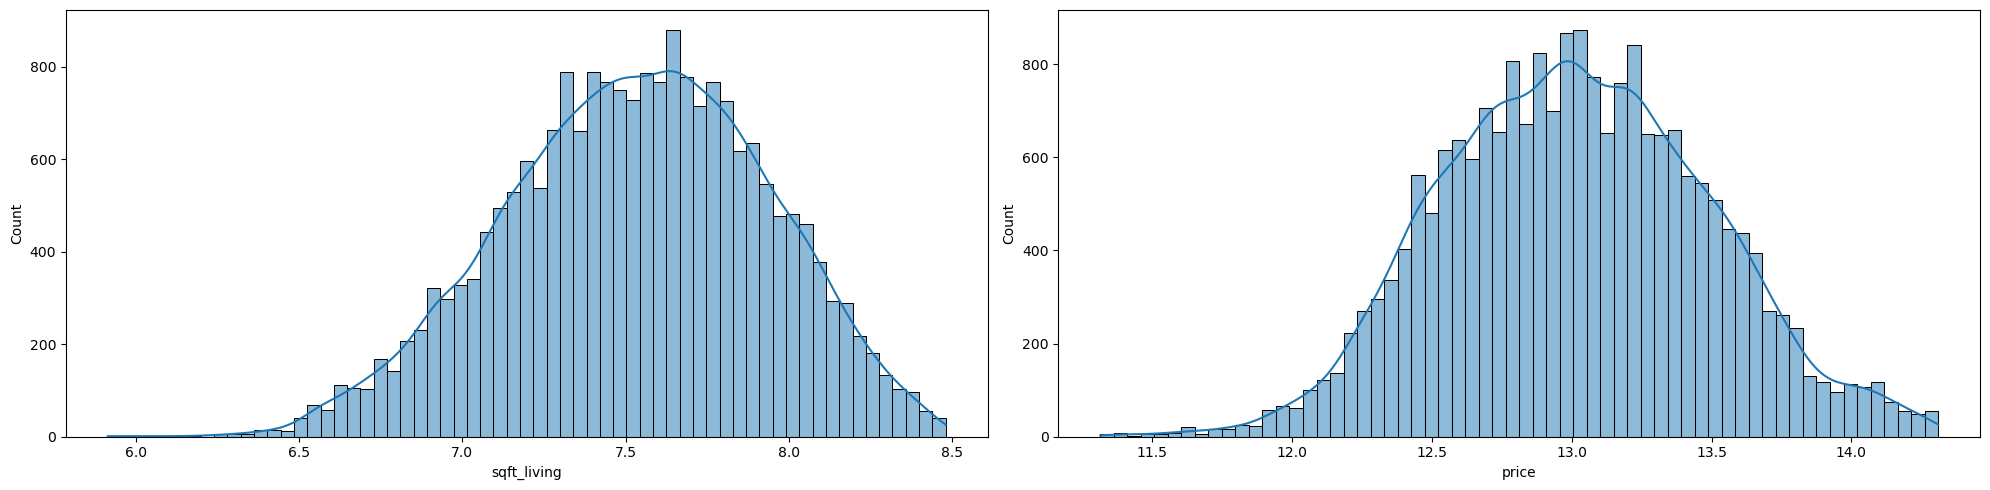

In [66]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))

sns.histplot(data=df2, x="sqft_living", kde=True, ax=axes[0])
sns.histplot(data=df2, x="price", kde=True, ax=axes[1])

plt.tight_layout()
plt.show()

### Standardisation (Z-score Normalisation)

In [67]:
# normalize (subract mean and divide by std)
# def normalize(feature):
# return (feature - feature.mean()) / feature.std()

df2['sqft_living'] = (df2['sqft_living'] - df2['sqft_living'].mean()) / df2['sqft_living'].std()
df2['price'] = (df2['price'] - df2['price'].mean()) / df2['price'].std()

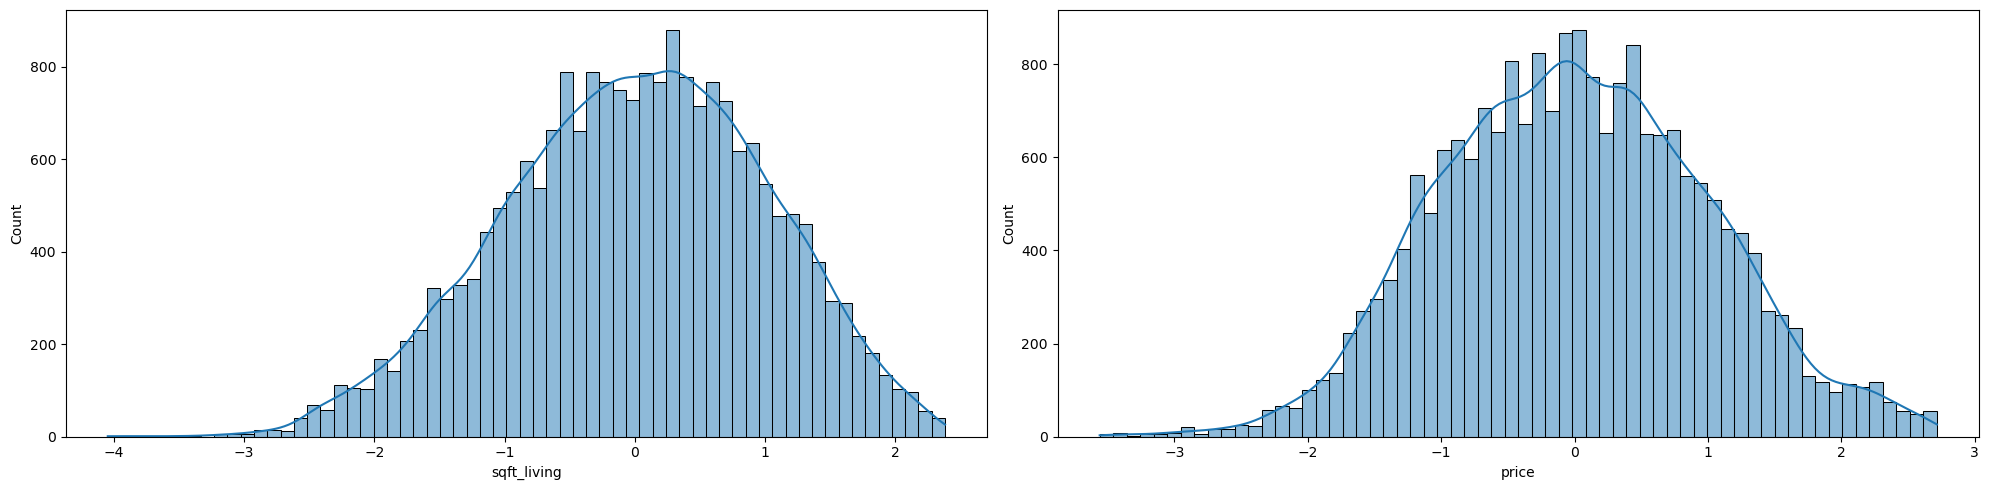

In [68]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))

sns.histplot(data=df2, x="sqft_living", kde=True, ax=axes[0])
sns.histplot(data=df2, x="price", kde=True, ax=axes[1])

plt.tight_layout()
plt.show()

In [69]:
df2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_basement', 'yr_built', 'zipcode',
       'year_sold', 'renovated'],
      dtype='object')

In [70]:
ols_formula = 'price ~ sqft_living + C(bedrooms) + C(bathrooms) + C(floors) + C(waterfront) + C(view) + C(condition) + C(grade) + C(sqft_basement) + C(yr_built) + C(zipcode) + C(year_sold) + C(renovated)'
OLS = ols(formula = ols_formula, data = df2)
model2 = OLS.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1232.
Date:                Mon, 25 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:10:07   Log-Likelihood:                -8870.5
No. Observations:               20755   AIC:                         1.795e+04
Df Residuals:                   20649   BIC:                         1.879e+04
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -1.9735      0.192    -10.279      0.000      -2.350      -1.597
C(bedrooms)[T.2]            -0.0750      0.030     -2.532      0.011      -0.133      -0.017
C(bedrooms)[T.3]            -0.0997      0.030     -3.334      0.001      -0.158      -0.041
C(bedrooms)[T.4]            -0.1085      0.031     -3.534      0.000      -0.169      -0.048
C(bedrooms)[T.5]            -0.1567      0.032     -4.841      0.000      -0.220      -0.093
C(bedrooms)[T.6]            -0.2203      0.040     -5.505      0.000      -0.299      -0.142
C(bathrooms)[T.1]            0.4189      0.186      2.246      0.025       0.053       0.784
C(bathrooms)[T.2]            0.4212      0.187      2.257      0.024       0.055       0.787
C(bathrooms)[T.3]            0.4834      0.187      2.588      0.010       0.117       0.850
C(bathrooms)[T.4]            0.5309      0.187      2.836      0.005       0.164       0.898
C(floors)[T.1.5]            -0.0319      0.011     -2.977      0.003      -0.053      -0.011
C(floors)[T.2.0]            -0.0789      0.009     -9.264      0.000      -0.096      -0.062
C(floors)[T.2.5]            -0.1156      0.034     -3.398      0.001      -0.182      -0.049
C(floors)[T.3.0]            -0.2928      0.019    -15.139      0.000      -0.331      -0.255
C(waterfront)[T.1]           0.8141      0.050     16.215      0.000       0.716       0.912
C(view)[T.1.0]               0.2645      0.022     11.938      0.000       0.221       0.308
C(view)[T.2.0]               0.2686      0.013     20.064      0.000       0.242       0.295
C(view)[T.3.0]               0.4269      0.019     22.576      0.000       0.390       0.464
C(view)[T.4.0]               0.6534      0.031     21.017      0.000       0.592       0.714
C(condition)[T.3]            0.2657      0.030      8.761      0.000       0.206       0.325
C(condition)[T.4]            0.3592      0.030     11.785      0.000       0.299       0.419
C(condition)[T.5]            0.4787      0.032     15.182      0.000       0.417       0.541
C(grade)[T.6]                0.1525      0.027      5.698      0.000       0.100       0.205
C(grade)[T.7]                0.3553      0.027     13.170      0.000       0.302       0.408
C(grade)[T.8]                0.5792      0.028     20.515      0.000       0.524       0.635
C(grade)[T.9]                0.8519      0.030     28.508      0.000       0.793       0.911
C(grade)[T.10]               1.0364      0.032     32.015      0.000       0.973       1.100
C(grade)[T.11]               1.2568      0.040     31.420      0.000       1.178       1.335
C(sqft_basement)[T.500]     -0.0569      0.009     -6.547      0.000      -0.074      -0.040
C(sqft_basement)[T.1000]    -0.1316      0.009    -15.144      0.000      -0.149      -0.115
C(sqft_basemen

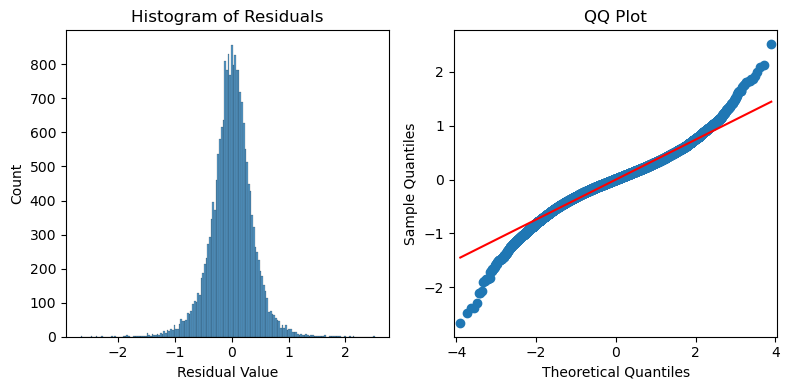

In [71]:
# Calculate the residuals.
residuals = model2.resid

fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("QQ Plot")

plt.tight_layout()
plt.show()

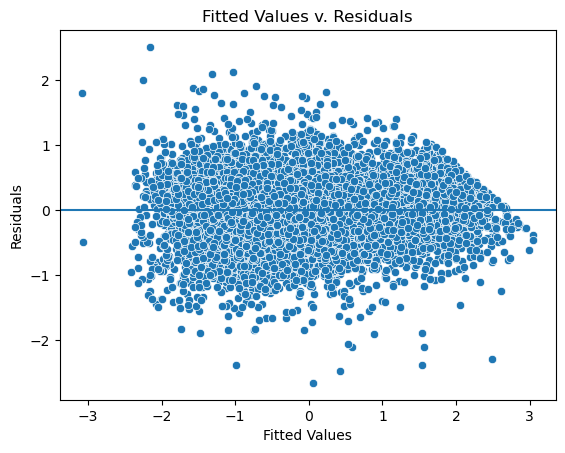

In [72]:
fig = sns.scatterplot(x = model2.fittedvalues, y = model2.resid)

fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")
fig.axhline(0)

plt.show()

In [73]:
df2.corr()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,year_sold,renovated
price,1.000000,0.318697,0.460754,0.629344,0.293652,0.078157,0.268950,0.033807,0.654607,0.250212,0.081602,-0.013810,0.005697,0.090324
bedrooms,0.318697,1.000000,0.472722,0.632841,0.167035,-0.033381,0.047950,0.021127,0.344197,0.251478,0.178095,-0.160868,-0.005791,0.005043
bathrooms,0.460754,0.472722,1.000000,0.654554,0.358761,0.006455,0.136630,-0.073703,0.538721,0.272743,0.369385,-0.134664,-0.021002,0.052909
sqft_living,0.629344,0.632841,0.654554,1.000000,0.351557,0.013302,0.183234,-0.061163,0.708205,0.348444,0.324618,-0.217911,-0.026295,0.033716
floors,0.293652,0.167035,0.358761,0.351557,1.000000,-0.001329,-0.003040,-0.279129,0.456904,-0.281931,0.469975,-0.057728,-0.018016,-0.000915
waterfront,0.078157,-0.033381,0.006455,0.013302,-0.001329,1.000000,0.307391,0.016113,0.007530,0.028032,-0.035678,0.043468,-0.007718,0.073423
view,0.268950,0.047950,0.136630,0.183234,-0.003040,0.307391,1.000000,0.043699,0.173617,0.210909,-0.071047,0.103759,0.002019,0.079804
condition,0.033807,0.021127,-0.073703,-0.061163,-0.279129,0.016113,0.043699,1.000000,-0.173307,0.171528,-0.334250,0.000139,-0.043889,-0.057402
grade,0.654607,0.344197,0.538721,0.708205,0.456904,0.007530,0.173617,-0.173307,1.000000,0.079279,0.419225,-0.178375,-0.029403,-0.000809
sqft_basement,0.250212,0.251478,0.272743,0.348444,-0.281931,0.028032,0.210909,0.171528,0.079279,1.000000,-0.131798,0.111945,-0.012263,0.053279


In [74]:
abs(df2.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,year_sold,renovated
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,True,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [75]:
df=df2.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)

In [76]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
